In [1]:
!pip install plotly
!pip install psycopg2
!pip install sqlalchemy
!pip install -U kaleido

You should consider upgrading via the 'c:\users\moda\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\moda\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\moda\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\moda\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:

import plotly.express as px
import pandas as pd
import psycopg2
import os
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy import text
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

# Connect to the database

- Embed the credentials.
- Run the engine and create SQL commands to query the database. 
<hr>

In [3]:
redshift_endpoint = os.getenv('db_host')
redshift_user = os.getenv('db_user')
redshift_pass = os.getenv('db_password')
port = os.getenv('db_port')
dbname = os.getenv('db_name')

In [4]:
engine_string = f"postgresql+psycopg2://{redshift_user}:{redshift_pass}@{redshift_endpoint}:{port}/{dbname}"
engine = create_engine(engine_string)

In [5]:
sql1= """
with jan_cohort as (
    select t.user_id as user_id
from analyst_task.transactions t 
    where date_part('month', t.time_stamp) = 1 and date_part('year', t.time_stamp) = 2019
),
new_customers as (
    select count(user_id) as jan_new_customers
    from jan_cohort
),
revisit as (
select 
    date_part('year', ua."date") as yr,
    date_part('month', ua."date") as mth,
    count (distinct ua.user_id) as num_engaged_users,
    count (ua.user_id) as num_interactions
from analyst_task.user_activity ua 
inner join jan_cohort on jan_cohort.user_id = ua.user_id 
    where yr=2019
    and greatest(count_events_viewed, count_events_saved, count_tickets_purchased, count_tickets_purchased_mobile, count_tickets_purchased_web, count_mobile_sessions, count_web_sessions, count_waitinglists_joined) >= 1
    group by yr, mth
)
select *
from revisit, new_customers
order by revisit.mth;
"""

In [6]:
df1 = pd.read_sql_query(text(sql1), engine)
df1['%_engagement'] = round(df1['num_engaged_users']/df1['jan_new_customers'] * 100, 2)
df1['interactions_per_engaged_user'] = round(df1['num_interactions']/df1['num_engaged_users'], 2)
df1.head(12)

,yr,mth,num_engaged_users,num_interactions,jan_new_customers,%_engagement,interactions_per_engaged_user
0,2019.0,1.0,19547,45111,19558,99.94,2.31
1,2019.0,2.0,9760,26532,19558,49.90,2.72
2,2019.0,3.0,6964,19157,19558,35.61,2.75
3,2019.0,4.0,4971,12465,19558,25.42,2.51
4,2019.0,5.0,4759,13066,19558,24.33,2.75
5,2019.0,6.0,3867,9551,19558,19.77,2.47
6,2019.0,7.0,3459,8612,19558,17.69,2.49
7,2019.0,8.0,3052,7555,19558,15.60,2.48
8,2019.0,9.0,3229,8287,19558,16.51,2.57
9,2019.0,10.0,3336,9484,19558,17.06,2.84


In [7]:
sql2= """
with feb_cohort as (
    select t.user_id as user_id
from analyst_task.transactions t 
    where date_part('month', t.time_stamp) = 2
),
new_customers as (
    select count(user_id) as feb_new_customers
    from feb_cohort
),
revisit as (
select 
    date_part('year', ua."date") as yr,
    date_part('month', ua."date") as mth,
    count (distinct ua.user_id) as num_engaged_users,
    count (ua.user_id) as num_interactions
from analyst_task.user_activity ua 
inner join feb_cohort on feb_cohort.user_id = ua.user_id 
    where yr=2019
    and greatest(count_events_viewed, count_events_saved, count_tickets_purchased, count_tickets_purchased_mobile, count_tickets_purchased_web, count_mobile_sessions, count_web_sessions, count_waitinglists_joined) >= 1
    and mth >= 2
    group by yr, mth

)
select *
from revisit, new_customers
order by revisit.mth;
"""

In [8]:
df2 = pd.read_sql_query(text(sql2), engine)
df2['%_engagement'] = round(df2['num_engaged_users']/df2['feb_new_customers'] * 100, 2)
df2['interactions_per_engaged_user'] = round(df2['num_interactions']/df2['num_engaged_users'], 2)
df2['mth'] = df2['mth']-1
df2.head(12)

,yr,mth,num_engaged_users,num_interactions,feb_new_customers,%_engagement,interactions_per_engaged_user
0,2019.0,1.0,23843,55853,23852,99.96,2.34
1,2019.0,2.0,10504,28601,23852,44.04,2.72
2,2019.0,3.0,7105,17340,23852,29.79,2.44
3,2019.0,4.0,6263,16410,23852,26.26,2.62
4,2019.0,5.0,4793,11853,23852,20.09,2.47
5,2019.0,6.0,4261,10482,23852,17.86,2.46
6,2019.0,7.0,3771,9148,23852,15.81,2.43
7,2019.0,8.0,3835,9657,23852,16.08,2.52
8,2019.0,9.0,3906,10962,23852,16.38,2.81
9,2019.0,10.0,3881,10767,23852,16.27,2.77


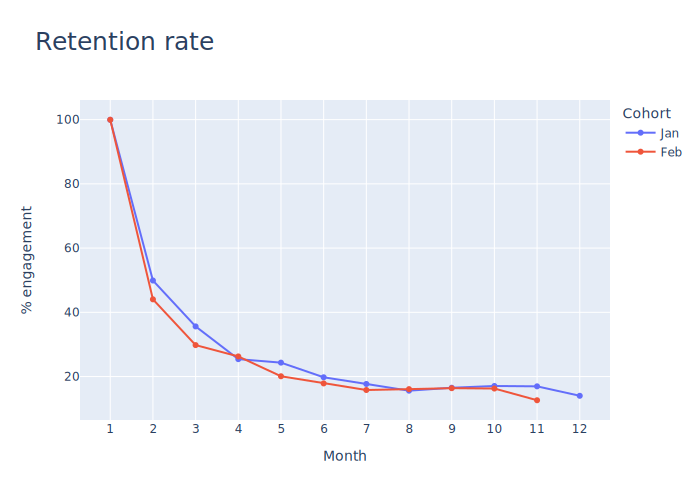

In [9]:
import plotly.graph_objects as go

dfs = {"Jan" : df1, "Feb": df2}
fig = go.Figure()

for i in dfs:
    fig = fig.add_trace(go.Scatter(x = dfs[i]['mth'],
                                   y = dfs[i]['%_engagement'], 

                                   name = i))
    
fig.update_layout(title = "Retention rate", title_font_size=25, legend_title_text = "Cohort")
fig.update_xaxes(title_text='Month', dtick = 1)
fig.update_yaxes(title_text='% engagement')
fig.show(renderer="svg")

<font size="4">
<ul>
    <li>Jan_New_Customers = 19558</li>
    <li>Feb_New_Customers = 23852</li>
</ul>

<hr>
<br>
The largest drop off in engagement is after one month for both Jan and Feb cohorts.

<ul>
    <li>Jan: 50% drop after one month.</li>
    <li>Feb: 56% drop after one month.</li>
</ul>

<br>
<hr>
After 11 months:
<ul>
    <li>Jan: 17% have been retained (i.e. still engage with the app)</li>
    <li>Feb: 12.6% have been retained (i.e. still engage with the app)</li>
</ul>

    
From this we can see that the <strong>users that bought tickets in January have a higher engagement rate</strong>.
</font>

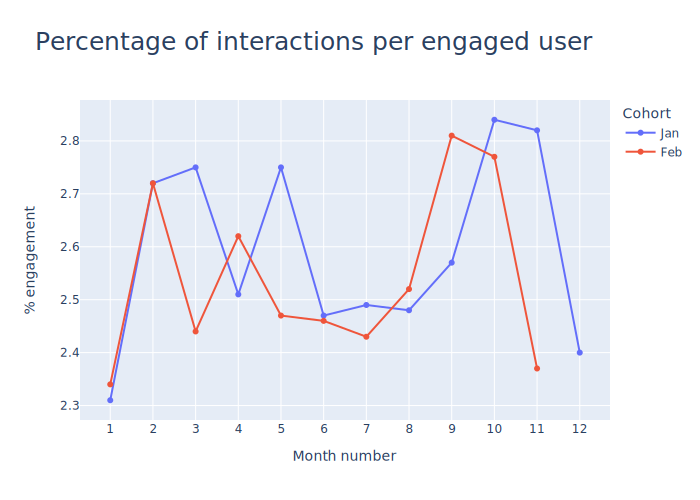

In [10]:
dfs = {"Jan" : df1, "Feb": df2}
fig = go.Figure()

for i in dfs:
    fig = fig.add_trace(go.Scatter(x = dfs[i]['mth'],
                                   y = dfs[i]['interactions_per_engaged_user'], 

                                   name = i))
    
fig.update_layout(title = "Percentage of interactions per engaged user", title_font_size=25, legend_title_text = "Cohort")
fig.update_xaxes(title_text='Month number', dtick = 1)
fig.update_yaxes(title_text='% engagement')
fig.show(renderer="svg")

There is a higher number of interactions for the months of September, October and November 2019.

# Look at the Age of the users
1. Age of the January and February cohorts.
2. Look at the age of the users and the engagement with DICE over time.

In [11]:
sql3= """
select
    u.user_id,
    u.date_of_birth,
    current_date
from analyst_task.users u
inner join analyst_task.transactions t
    on u.user_id = t.user_id
    where date_part('month', t.time_stamp) = 1 and date_part('year', t.time_stamp) = 2019
"""

In [12]:
jan_cohort_age = pd.read_sql_query(text(sql3), engine)
jan_cohort_age['date_of_birth'] = pd.to_datetime(jan_cohort_age['date_of_birth'], errors='coerce')
jan_cohort_age['date'] = pd.to_datetime(jan_cohort_age['date'], errors='coerce')
jan_cohort_age['age'] = (jan_cohort_age['date'] - jan_cohort_age['date_of_birth']) // np.timedelta64(1, 'Y')

In [13]:
jan_cohort_age.count()

user_id          19558
date_of_birth    19011
date             19558
age              19011
dtype: int64

In [14]:
jan_cohort_age['age_groups'] = pd.cut(jan_cohort_age['age'], bins=(0,18,25,30,40,50,np.inf), labels=['Under 18','19_to_25','26_to_30','31_to_40','41_to_50','Over 50'])
age_counts = jan_cohort_age['age_groups'].value_counts()
age_counts

26_to_30    5895
31_to_40    5726
19_to_25    4482
41_to_50    1755
Over 50     1121
Under 18      32
Name: age_groups, dtype: int64

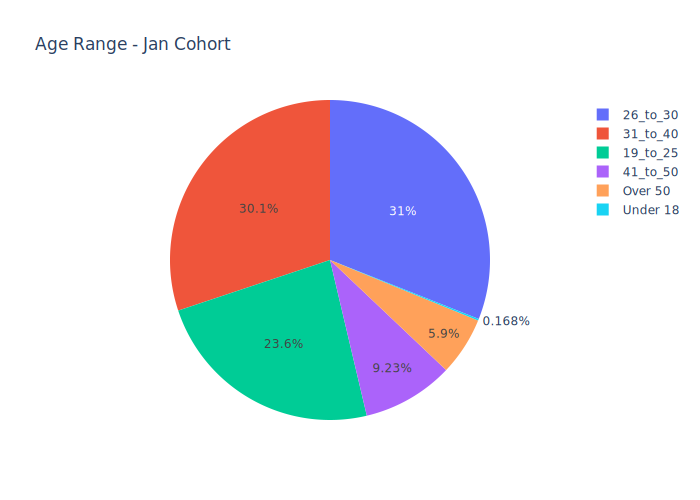

In [15]:
fig = px.pie(jan_cohort_age, values=age_counts, names = age_counts.keys(), title='Age Range - Jan Cohort')
fig.show(renderer="svg")

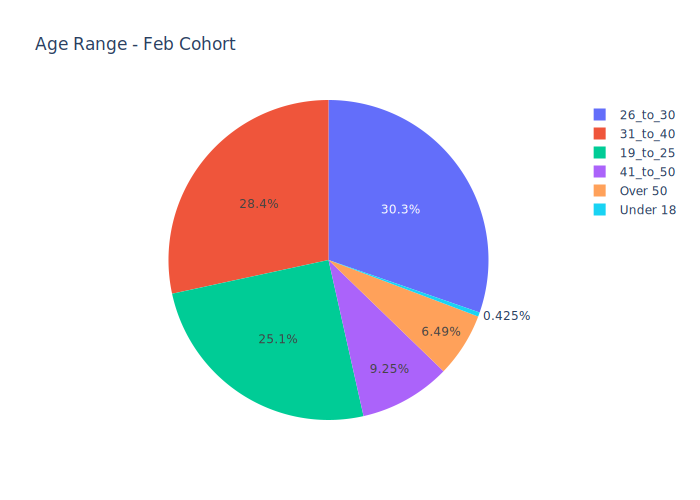

In [16]:
sql4 = """
select
    u.user_id,
    u.date_of_birth,
    current_date
from analyst_task.users u
inner join analyst_task.transactions t
    on u.user_id = t.user_id
    where date_part('month', t.time_stamp) = 2 and date_part('year', t.time_stamp) = 2019
"""
df4 = pd.read_sql_query(text(sql4), engine)
df4['date_of_birth'] = pd.to_datetime(df4['date_of_birth'], errors='coerce')
df4['date'] = pd.to_datetime(df4['date'], errors='coerce')
df4['age'] = (df4['date'] - df4['date_of_birth']) // np.timedelta64(1, 'Y')
df4['age_groups'] = pd.cut(df4['age'], bins=(0,18,25,30,40,50,np.inf), labels=['Under 18','19_to_25','26_to_30','31_to_40','41_to_50','Over 50'])
age_counts_feb = df4['age_groups'].value_counts()

fig = px.pie(df4, values=age_counts_feb, names = age_counts.keys(), title='Age Range - Feb Cohort')
fig.show(renderer="svg")

# January cohort
- purchase_app_type
- genre
- venue type

In [17]:
# query for the new customers in jan and there user ids

sql7 = """
with jan_cohort as (
    select t.user_id as user_id
from analyst_task.transactions t 

where date_part('month', t.time_stamp) = 1 and date_part('year', t.time_stamp) = 2019
),

revisit as (
select 
    ua.user_id,
    date_part('year', ua."date") as yr,
    date_part('month', ua."date") as mth,
    count (distinct ua.user_id) as num_engaged_users,
    count (ua.user_id) as num_interactions
from analyst_task.user_activity ua 
inner join jan_cohort on jan_cohort.user_id = ua.user_id 
    where yr=2019
    and greatest(count_events_viewed, count_events_saved, count_tickets_purchased, count_tickets_purchased_mobile, count_tickets_purchased_web, count_mobile_sessions, count_web_sessions, count_waitinglists_joined) >= 1
    group by yr, mth, ua.user_id
)
select *
from revisit
order by revisit.mth;
"""
jan_co = pd.read_sql_query(text(sql7), engine)

In [18]:
df = pd.merge(jan_co,jan_cohort_age,on='user_id')
df.drop(columns=['date_of_birth', 'date', 'age'], inplace= True)
df.head()

,user_id,yr,mth,num_engaged_users,num_interactions,age_groups
0,01911fcfd69ab3325ccc3ed7911c656d,2019.0,1.0,1,1,26_to_30
1,038a75c9ebae7a00dd1f256890baab30,2019.0,1.0,1,2,19_to_25
2,038a75c9ebae7a00dd1f256890baab30,2019.0,3.0,1,1,19_to_25
3,0225a05d5d0f13cb645c7d99bd7086b0,2019.0,1.0,1,1,31_to_40
4,03ff9dbe68ee219d827b6decfc37c667,2019.0,1.0,1,4,19_to_25


In [19]:
grouped = df.groupby(['mth', 'age_groups']).size()
df = grouped.to_frame()
df.rename(columns = {0:'Number_of_users'}, inplace = True)
df.reset_index(level=['mth', 'age_groups'], inplace = True)

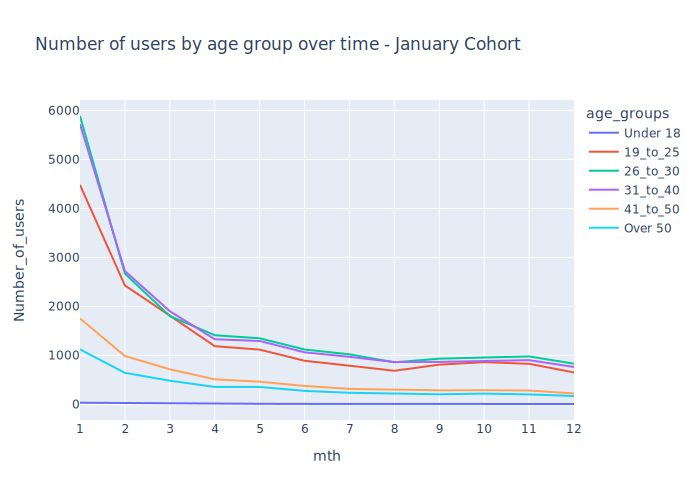

In [20]:
fig = px.line(df, x='mth', y='Number_of_users', color='age_groups', title = 'Number of users by age group over time - January Cohort')
fig.update_xaxes(dtick = 1)
fig.show(renderer="svg")

# Genre, purchase app type and venues

In [21]:
#need three inner joins on event_id

sql5 = """
select 
    t.user_id,
    t.event_id,
    t.purchase_app_type, 
    eg.genre,
    e.venue_country,
    e.venue_city,
    e.event_category
    
from analyst_task.transactions t 
    
inner join analyst_task.event_genres eg
    on eg.event_id = t.event_id
inner join analyst_task.events e
    on t.event_id = e.event_id

where date_part('month', t.time_stamp) = 1 and date_part('year', t.time_stamp) = 2019
"""
jan_info = pd.read_sql_query(text(sql5), engine)
jan_info.head()

,user_id,event_id,purchase_app_type,genre,venue_country,venue_city,event_category
0,779a04faa2809de3cb974e3c527f129c,9ad3b55a2e774ae6ed8115f2326e63e4,mobile_app,hiphop,United States,New York,party
1,779a04faa2809de3cb974e3c527f129c,9ad3b55a2e774ae6ed8115f2326e63e4,mobile_app,rap,United States,New York,party
2,779a04faa2809de3cb974e3c527f129c,9ad3b55a2e774ae6ed8115f2326e63e4,mobile_app,trap,United States,New York,party
3,824ecc0042b3f42ad98c44c8bae69da0,9ad3b55a2e774ae6ed8115f2326e63e4,mobile_app,hiphop,United States,New York,party
4,824ecc0042b3f42ad98c44c8bae69da0,9ad3b55a2e774ae6ed8115f2326e63e4,mobile_app,rap,United States,New York,party


In [22]:
purchase_type = jan_info.groupby(['purchase_app_type']).size()
df_type = purchase_type.to_frame()
df_type.rename(columns = {0:'Number_of_users'}, inplace = True)
df_type.reset_index(inplace = True)

df_type.head()

,purchase_app_type,Number_of_users
0,mobile_app,21020
1,web_app,27963


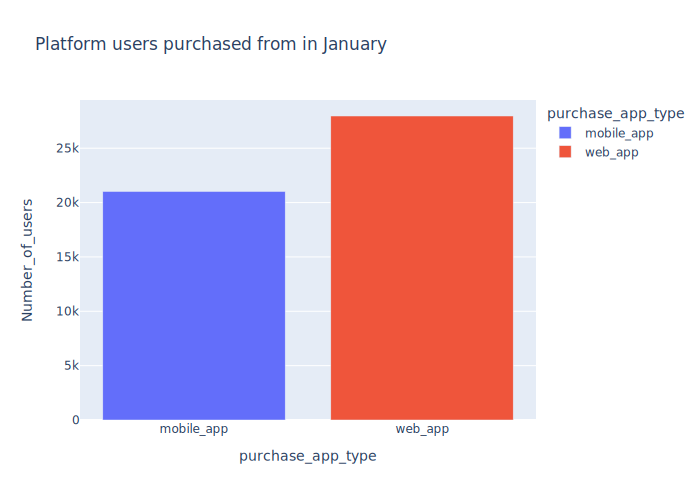

In [23]:
fig = px.bar(df_type, x='purchase_app_type', y='Number_of_users', color = 'purchase_app_type', title = 'Platform users purchased from in January')
fig.show(renderer="svg")

In [24]:
df_jan = pd.merge(jan_co,jan_info,on='user_id')
df_jan.head()

,user_id,yr,mth,num_engaged_users,num_interactions,event_id,purchase_app_type,genre,venue_country,venue_city,event_category
0,01911fcfd69ab3325ccc3ed7911c656d,2019.0,1.0,1,1,0f737e3d58eac39fa6d7d1a31963fe6a,mobile_app,disco,France,Paris,party
1,01911fcfd69ab3325ccc3ed7911c656d,2019.0,1.0,1,1,0f737e3d58eac39fa6d7d1a31963fe6a,mobile_app,funk,France,Paris,party
2,01911fcfd69ab3325ccc3ed7911c656d,2019.0,1.0,1,1,0f737e3d58eac39fa6d7d1a31963fe6a,mobile_app,soul,France,Paris,party
3,038a75c9ebae7a00dd1f256890baab30,2019.0,1.0,1,2,7b0f98c9827941178ac24698c65a03d1,web_app,dance,United Kingdom,London,party
4,038a75c9ebae7a00dd1f256890baab30,2019.0,3.0,1,1,7b0f98c9827941178ac24698c65a03d1,web_app,dance,United Kingdom,London,party


In [25]:
grouped_app_type = df_jan.groupby(['mth', 'purchase_app_type']).size()
df_app_type = grouped_app_type.to_frame()
df_app_type.rename(columns = {0:'Number_of_users'}, inplace = True)
df_app_type.reset_index(level=['mth', 'purchase_app_type'], inplace = True)

grouped_country = df_jan.groupby(['mth', 'venue_country']).size()
df_country = grouped_country.to_frame()
df_country.rename(columns = {0:'Number_of_users'}, inplace = True)
df_country.reset_index(level=['mth', 'venue_country'], inplace = True)

grouped_genre = df_jan.groupby(['mth', 'genre']).size()
df_genre = grouped_genre.to_frame()
df_genre.rename(columns = {0:'Number_of_users'}, inplace = True)
df_genre.reset_index(level=['mth', 'genre'], inplace = True)

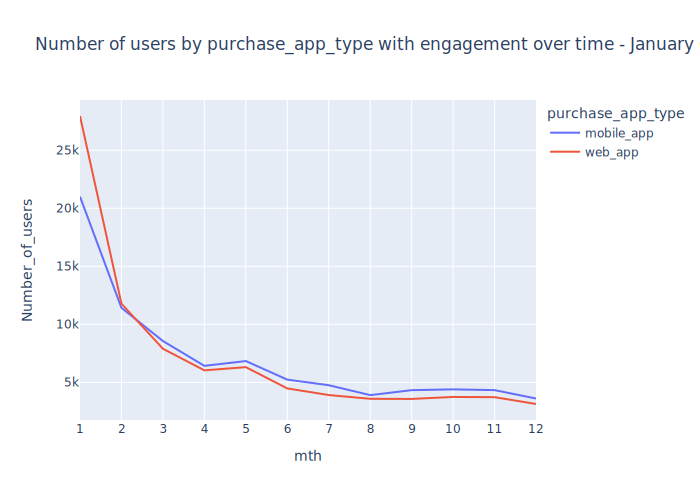

In [26]:
fig = px.line(df_app_type, x='mth', y='Number_of_users', color='purchase_app_type', title = 'Number of users by purchase_app_type with engagement over time - January Cohort')
fig.update_xaxes(dtick = 1)
fig.show(renderer="svg")

In [27]:
jan_info['venue_country'].unique().tolist()

['United States',
 'United Kingdom',
 'France',
 'Ireland',
 '',
 'Germany',
 'Malta']

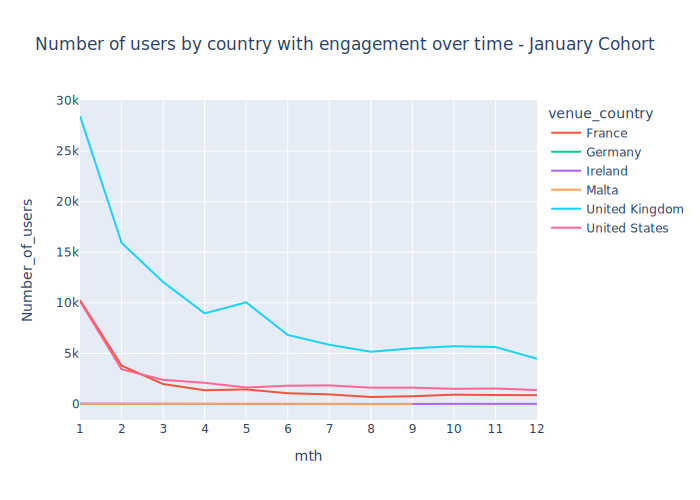

In [28]:
fig = px.line(df_country, x='mth', y='Number_of_users', color='venue_country', title = 'Number of users by country with engagement over time - January Cohort')
fig.update_xaxes(dtick = 1)
fig.show(renderer="svg")

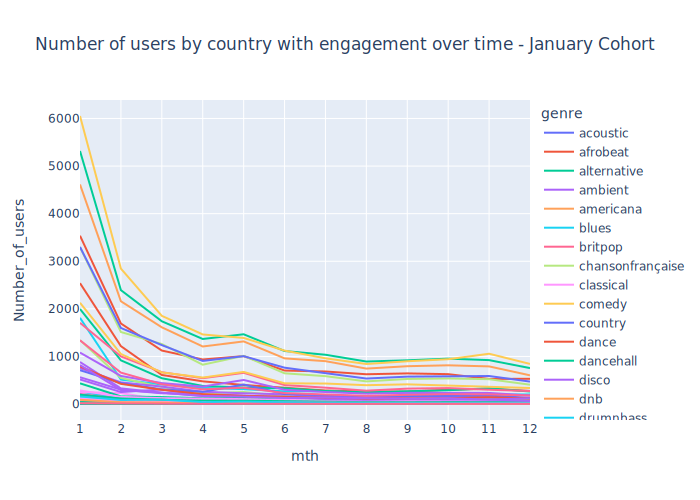

In [29]:
fig = px.line(df_genre, x='mth', y='Number_of_users', color='genre', title = 'Number of users by country with engagement over time - January Cohort')
fig.update_xaxes(dtick = 1)
fig.show(renderer="svg")

# Filter dataframe for the United Kingdom

In [30]:
jan_uk = df_jan[df_jan['venue_country'] == 'United Kingdom']
jan_uk

,user_id,yr,mth,num_engaged_users,num_interactions,event_id,purchase_app_type,genre,venue_country,venue_city,event_category
3,038a75c9ebae7a00dd1f256890baab30,2019.0,1.0,1,2,7b0f98c9827941178ac24698c65a03d1,web_app,dance,United Kingdom,London,party
4,038a75c9ebae7a00dd1f256890baab30,2019.0,3.0,1,1,7b0f98c9827941178ac24698c65a03d1,web_app,dance,United Kingdom,London,party
9,0313862e66816dd1673def211597ab81,2019.0,1.0,1,9,407db01dd77fdf631760f7c8599e0bd1,mobile_app,hiphop,United Kingdom,London,gig
10,0313862e66816dd1673def211597ab81,2019.0,1.0,1,9,407db01dd77fdf631760f7c8599e0bd1,mobile_app,rap,United Kingdom,London,gig
11,0313862e66816dd1673def211597ab81,2019.0,2.0,1,5,407db01dd77fdf631760f7c8599e0bd1,mobile_app,hiphop,United Kingdom,London,gig
...,...,...,...,...,...,...,...,...,...,...,...
170928,b34a8a72d576974d177a88f9fb1d4fca,2019.0,6.0,1,3,99576fbfb11e1807e500360cd29ed221,mobile_app,electronic,United Kingdom,London,gig
170929,b34a8a72d576974d177a88f9fb1d4fca,2019.0,6.0,1,3,99576fbfb11e1807e500360cd29ed221,mobile_app,hiphop,United Kingdom,London,gig
170930,b34a8a72d576974d177a88f9fb1d4fca,2019.0,6.0,1,3,99576fbfb11e1807e500360cd29ed221,mobile_app,dance,United Kingdom,London,gig
170931,b34a8a72d576974d177a88f9fb1d4fca,2019.0,6.0,1,3,99576fbfb11e1807e500360cd29ed221,mobile_app,pop,United Kingdom,London,gig


In [31]:
grouped_city = jan_uk.groupby(['mth', 'venue_city']).size()
df_uk_city = grouped_city.to_frame()
df_uk_city.rename(columns = {0:'Number_of_users'}, inplace = True)
df_uk_city.reset_index(level=['mth', 'venue_city'], inplace = True)

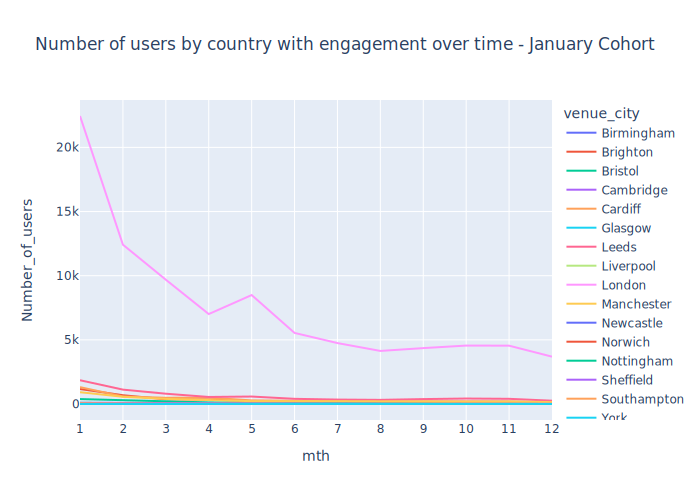

In [32]:
fig = px.line(df_uk_city, x='mth', y='Number_of_users', color='venue_city', title = 'Number of users by country with engagement over time - January Cohort')
fig.update_xaxes(dtick = 1)
fig.show(renderer="svg")

# Extensions:
More data:
- Create a cohort table for each month
- Create similar analysis for each month

More time:
- Create a correlation matrix between the retention percentage and other metrics using seaborn
- Drill down into specific segments i.e. genre + age_range + purchase_app_type
- Look at retention of users that joined a waiting list